In [1]:
# To install the crypto module:
!pip install Historic-Crypto

# library source
# https://pypi.org/project/Historic-Crypto/

In [2]:
# the crypto functions
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies

# other stuff
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = Cryptocurrencies().find_crypto_pairs()
eurlist = data['id'].tolist()

for item in eurlist:
   if 'EUR' in item:
       print(item)


Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
SNX-EUR
ZRX-EUR
SYN-EUR
GALA-EUR
RNDR-EUR
LQTY-EUR
SOL-EUR
ENS-EUR
AUCTION-EUR
VGX-EUR
UMA-EUR
PERP-EUR
1INCH-EUR
DOGE-EUR
BTC-EUR
SHPING-EUR
SUKU-EUR
NCT-EUR
TRU-EUR
AXS-EUR
ETC-EUR
CRO-EUR
AVAX-EUR
ALGO-EUR
UNI-EUR
XLM-EUR
AERGO-EUR
AIOZ-EUR
NKN-EUR
DDX-EUR
KRL-EUR
CTX-EUR
CHZ-EUR
ATOM-EUR
USDC-EUR
REQ-EUR
ALCX-EUR
DIA-EUR
WCFG-EUR
XYO-EUR
MATIC-EUR
BADGER-EUR
BAT-EUR
ETH-EUR
WLUNA-EUR
SKL-EUR
FIL-EUR
BICO-EUR
ARPA-EUR
SNT-EUR
ANKR-EUR
TRAC-EUR
CRV-EUR
DESO-EUR
LINK-EUR
ADA-EUR
SUSHI-EUR
MASK-EUR
HIGH-EUR
ICP-EUR
IOTX-EUR
CGLD-EUR
BAND-EUR
EOS-EUR
POWR-EUR
MIR-EUR
NU-EUR
MANA-EUR
OMG-EUR
AAVE-EUR
USDT-EUR
BCH-EUR
UST-EUR
GRT-EUR
BTRST-EUR
LCX-EUR
NMR-EUR
GLM-EUR
ERN-EUR
RAD-EUR
FORTH-EUR
LTC-EUR
XTZ-EUR
BNT-EUR
CLV-EUR
SHIB-EUR
DOT-EUR
FIDA-EUR
RLY-EUR
XRP-EUR


In [4]:
five = ['BTC-EUR','ETH-EUR','XLM-EUR','ALGO-EUR','LINK-EUR']

In [5]:
fivedata = data[data['id'] == 'BTC-EUR','ETH-EUR','XLM-EUR','ALGO-EUR','LINK-EUR']

TypeError: '(0      False
1      False
2      False
3      False
4      False
       ...  
466    False
467    False
468    False
469    False
470    False
Name: id, Length: 471, dtype: bool, 'ETH-EUR', 'XLM-EUR', 'ALGO-EUR', 'LINK-EUR')' is an invalid key

In [6]:
data2 = data[data['id'].isin(five)]
data2

,id,display_name,fx_stablecoin,max_slippage_percentage,status
81,BTC-EUR,BTC/EUR,False,0.03000000,online
121,ALGO-EUR,ALGO/EUR,False,0.03000000,online
126,XLM-EUR,XLM/EUR,False,0.03000000,online
203,ETH-EUR,ETH/EUR,False,0.03000000,online
261,LINK-EUR,LINK/EUR,False,0.03000000,online


In [7]:
#import historical data 

coinprices = {}

for ticker in five: 
    tmp = HistoricalData(ticker, 21600, '2021-03-01-00-00').retrieve_data()
    coinprices[ticker] = tmp[['low','high','open', 'close']].mean(axis=1)

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2021-03-01T00:00:00
Provisional End: 2021-05-15T00:00:00
Data for chunk 1 of 5 extracted
Provisional Start: 2021-05-15T00:00:00
Provisional End: 2021-07-29T00:00:00
Data for chunk 2 of 5 extracted
Provisional Start: 2021-07-29T00:00:00
Provisional End: 2021-10-12T00:00:00
Data for chunk 3 of 5 extracted
Provisional Start: 2021-10-12T00:00:00
Provisional End: 2021-12-26T00:00:00
Data for chunk 4 of 5 extracted
Provisional Start: 2021-12-26T00:00:00
Provisional End: 2022-03-11T00:00:00
Data for chunk 5 of 5 extracted
Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API

In [8]:
coinprices

{'BTC-EUR': time
 2021-03-01 06:00:00    38939.6850
 2021-03-01 12:00:00    40206.6925
 2021-03-01 18:00:00    40697.6750
 2021-03-02 00:00:00    41000.6550
 2021-03-02 06:00:00    40661.7500
                           ...    
 2022-03-07 06:00:00    35097.4850
 2022-03-07 12:00:00    35647.6175
 2022-03-07 18:00:00    35071.1500
 2022-03-08 00:00:00    35251.8900
 2022-03-08 06:00:00    35539.5075
 Length: 1489, dtype: float64,
 'ETH-EUR': time
 2021-03-01 06:00:00    1227.4825
 2021-03-01 12:00:00    1272.8175
 2021-03-01 18:00:00    1281.4700
 2021-03-02 00:00:00    1303.9725
 2021-03-02 06:00:00    1298.3125
                          ...    
 2022-03-07 06:00:00    2328.3925
 2022-03-07 12:00:00    2369.7275
 2022-03-07 18:00:00    2319.6175
 2022-03-08 00:00:00    2317.4150
 2022-03-08 06:00:00    2349.8325
 Length: 1489, dtype: float64,
 'XLM-EUR': time
 2021-03-01 06:00:00    0.340865
 2021-03-01 12:00:00    0.348035
 2021-03-01 18:00:00    0.351263
 2021-03-02 00:00:00    0.354

<AxesSubplot:xlabel='time'>

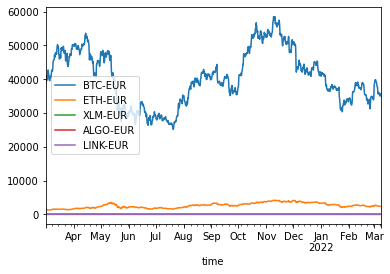

In [9]:
coinpricesdata = pd.DataFrame(coinprices)
coinpricesdata.plot()

<AxesSubplot:>

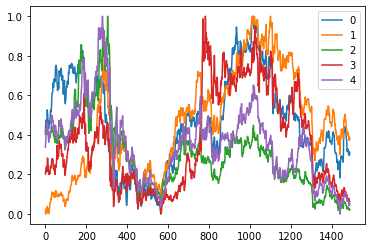

In [10]:
scaler = MinMaxScaler()
coinpricesdatascaled = pd.DataFrame(scaler.fit_transform(coinpricesdata))
coinpricesdatascaled.plot()

In [11]:
coinpricesdatascaled


,0,1,2,3,4
0,0.413154,0.000000,0.402834,0.201942,0.337515
1,0.451132,0.015484,0.417801,0.218243,0.361434
2,0.465848,0.018439,0.424539,0.213690,0.368419
3,0.474930,0.026125,0.430834,0.222688,0.405466
4,0.464771,0.024192,0.424765,0.231276,0.428077
...,...,...,...,...,...
1484,0.297989,0.376010,0.024060,0.069718,0.045678
1485,0.314478,0.390128,0.028206,0.076521,0.054411
1486,0.297199,0.373013,0.020025,0.062631,0.043668
1487,0.302617,0.372261,0.019265,0.061006,0.041504


<AxesSubplot:>

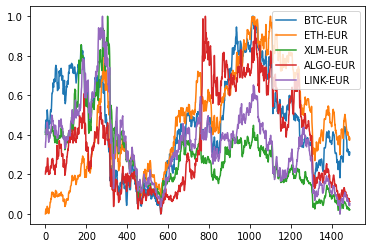

In [12]:
updatedcoin = coinpricesdatascaled.rename(columns={0:'BTC-EUR', 1:'ETH-EUR', 2:'XLM-EUR', 3:'ALGO-EUR', 4:'LINK-EUR'})
updatedcoin.plot()

In [14]:
updatedcoin.corr()

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.526102,0.524050,0.718583,0.625357
ETH-EUR,0.526102,1.000000,0.029308,0.719474,0.225027
XLM-EUR,0.524050,0.029308,1.000000,0.268537,0.914581
ALGO-EUR,0.718583,0.719474,0.268537,1.000000,0.454216
LINK-EUR,0.625357,0.225027,0.914581,0.454216,1.000000


In [15]:
coinpricesdata.corr()

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
BTC-EUR,1.000000,0.526102,0.524050,0.718583,0.625357
ETH-EUR,0.526102,1.000000,0.029308,0.719474,0.225027
XLM-EUR,0.524050,0.029308,1.000000,0.268537,0.914581
ALGO-EUR,0.718583,0.719474,0.268537,1.000000,0.454216
LINK-EUR,0.625357,0.225027,0.914581,0.454216,1.000000


In [19]:
pca = PCA()
pca.fit(updatedcoin.dropna())
pca

PCA()

([<matplotlib.axis.XTick at 0x7fec804b3bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

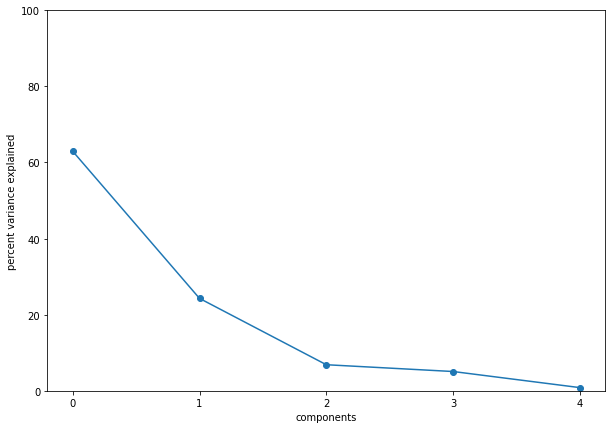

In [33]:
plt.figure(figsize = (10,7))
plt.plot(100*pca.explained_variance_ratio_, 'o-')
plt.xlabel('components')
plt.ylabel('percent variance explained')
plt.ylim([0,100])
plt.xticks(range(pca.n_components_))